In [1]:
import pandas as pd
import statistics
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def get_edges_from_file(filename):
    #First Task: Open the file
    with open (filename, 'r') as filehandle:
        raw_edges = filehandle.readlines()

    #Second Task: Open the list of list as integers
    raw_edges = [line.strip().split('\t') for line in raw_edges]
    formatted_edges = []
    for edge in raw_edges:
        edge = [int(node) for node in edge]
        formatted_edges.append(edge)
    
    return formatted_edges

# 
def calculate_degrees_from_edges(edge_list):
    degrees = {}
    for edge in edge_list:
        for node in edge:
            if node in degrees:
                degrees[node] += 1
            else:
                degrees[node] = 1

    return degrees

In [3]:
edges = get_edges_from_file('MAG-10-hyperedges.txt')
degrees = calculate_degrees_from_edges(edges)

counts = Counter(degrees.values())

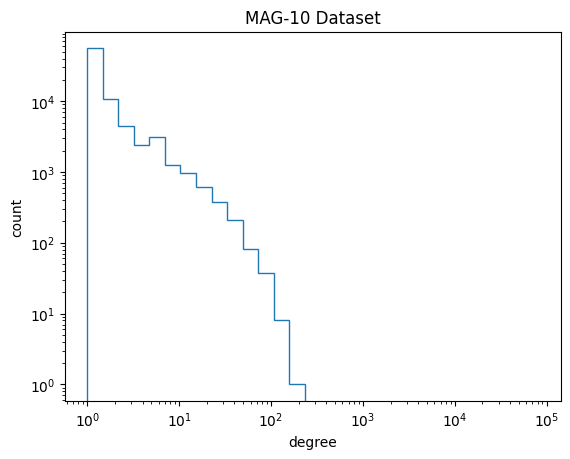

In [4]:
plt.figure()
plt.hist(
    degrees.values(), 
    bins=np.logspace(
        np.log10(1),np.log10(max(degrees)), 
                     30),
    fill = False,
    histtype = "step"             
    )

plt.xlabel("degree")
plt.ylabel("count")
plt.xscale("log")
plt.yscale("log")
plt.title("MAG-10 Dataset")
plt.savefig("MAG-10_Dataset.png", dpi = 600)